In [1]:
from keras.datasets import mnist

dataset = mnist

(train_data,train_target) , (test_data,test_target) = mnist.load_data()

Using TensorFlow backend.
/home/seyon/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/seyon/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/seyon/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/seyon/.local/lib/python3.6/site-packages/tensorflow/python/fra

In [11]:
from keras.models import Sequential
from keras.layers import Dense , Flatten
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
#Flatten Layer converts the 2D image to a coloumn vector

model.add(Dense(512,activation='relu'))
#1st Hidden Layer

model.add(Dense(256,input_dim=512,activation='relu'))
#2nd Hidden Layer

model.add(Dense(128,input_dim=256,activation='relu'))
#3rd Hidden Layer

model.add(Dense(10,input_dim=128,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
new_train_data=train_data/255.0
new_test_data=test_data/255.0

from keras.utils import np_utils

new_train_target = np_utils.to_categorical(train_target)

In [13]:
print(new_train_target[:5])
print(train_data[0])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0  

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


In [15]:
train_info = model.fit(new_train_data,new_train_target,epochs=20)

Epoch 1/20
60000/60000 [==============================] - 32s 538us/step - loss: 0.1955 - accuracy: 0.9416
Epoch 2/20
60000/60000 [==============================] - 31s 515us/step - loss: 0.0883 - accuracy: 0.9732
Epoch 3/20
60000/60000 [==============================] - 31s 511us/step - loss: 0.0616 - accuracy: 0.9806
Epoch 4/20
60000/60000 [==============================] - 31s 511us/step - loss: 0.0470 - accuracy: 0.9851
Epoch 5/20
60000/60000 [==============================] - 31s 518us/step - loss: 0.0378 - accuracy: 0.9882
Epoch 6/20
60000/60000 [==============================] - 32s 532us/step - loss: 0.0328 - accuracy: 0.9898
Epoch 7/20
60000/60000 [==============================] - 31s 519us/step - loss: 0.0279 - accuracy: 0.9915
Epoch 8/20
60000/60000 [==============================] - 32s 537us/step - loss: 0.0265 - accuracy: 0.9918
Epoch 9/20
60000/60000 [==============================] - 31s 514us/step - loss: 0.0211 - accuracy: 0.9932
Epoch 10/20
60000/60000 [============

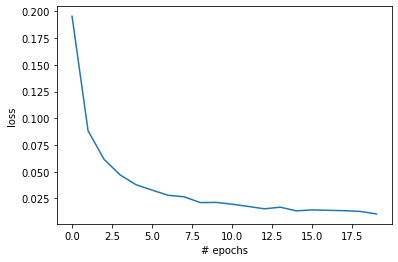

In [18]:
from matplotlib import pyplot as plt
plt.plot(train_info.history['loss'])
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.show()

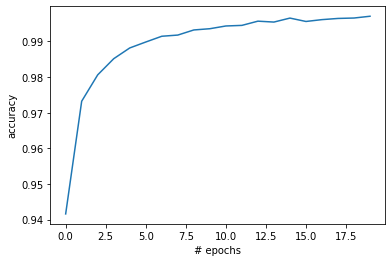

In [19]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.show()

In [24]:
new_test_target = np_utils.to_categorical(test_target)
print(model.evaluate(new_test_data , new_test_target))

10000/10000 [==============================] - 1s 115us/step
[0.1415402450793771, 0.978600025177002]


In [25]:
model.save_weights('MNIST_WEIGHTS_V1.h5')